<a href="https://www.kaggle.com/code/realmaliktalha/ecommerce-eda?scriptVersionId=139060542" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv")
df.head()

/tmp/ipykernel_20/3100484971.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv")


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# dropping null columns (from 22 to 26)
df.drop(df.loc[:, df.columns.str.contains("Unnamed")], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [6]:
print("Total null entry rows in DF: " + str(df.isna().sum().sum()))
df.isna().sum() 

Total null entry rows in DF: 9882467


item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601226
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

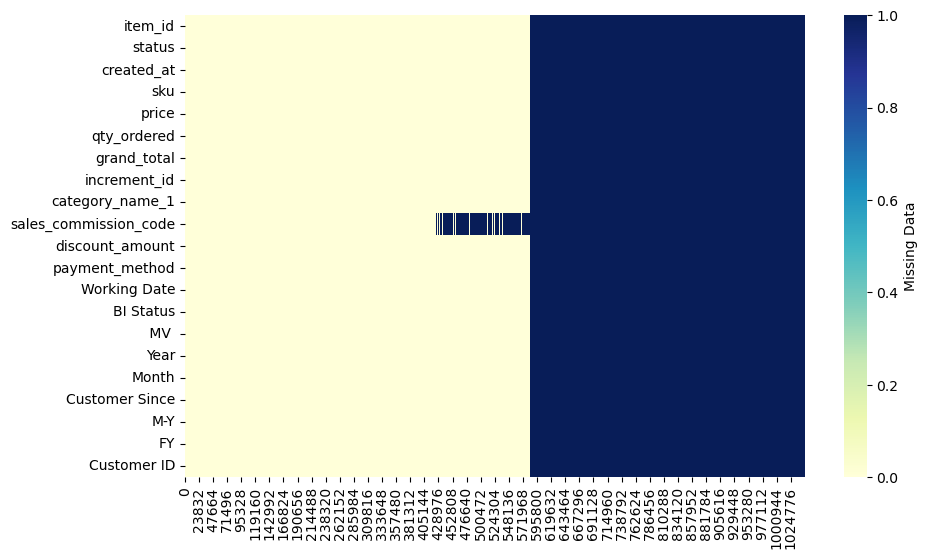

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

In [8]:
df.iloc[584520:584600]  # Rows are null after #584523

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"217,280",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.drop(df.index[584523:], axis=0, inplace=True) # dropping null rows after #584523
# OR 
# Use df.dropna(how = 'all') # will drop a row only if all columns are null
    # 'how' can take (all, any)

In [10]:
df.tail(20)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584503,905185.0,processing,8/28/2018,MEFCUR5B716B0A6B670,499.0,1.0,649.0,100562370,Men's Fashion,NaN,...,Payaxis,8/28/2018,Gross,499,2018.0,8.0,2016-7,8-2018,FY19,1195.0
584504,905186.0,processing,8/28/2018,MEFCUR5B716B0A6B670,499.0,1.0,649.0,100562371,Men's Fashion,NaN,...,bankalfalah,8/28/2018,Gross,499,2018.0,8.0,2016-7,8-2018,FY19,1195.0
584505,905187.0,processing,8/28/2018,MEFCUR5B716B0A6B670,499.0,1.0,649.0,100562372,Men's Fashion,NaN,...,Payaxis,8/28/2018,Gross,499,2018.0,8.0,2016-7,8-2018,FY19,1195.0
584506,905188.0,processing,8/28/2018,MEFCUR5B716B0A6B670,499.0,1.0,649.0,100562373,Men's Fashion,NaN,...,Payaxis,8/28/2018,Gross,499,2018.0,8.0,2016-7,8-2018,FY19,1195.0
584507,905189.0,processing,8/28/2018,MEFCUR5B716B0A6B670,499.0,1.0,649.0,100562374,Men's Fashion,NaN,...,bankalfalah,8/28/2018,Gross,499,2018.0,8.0,2016-7,8-2018,FY19,1195.0
584508,905190.0,processing,8/28/2018,MEFCUR5B716B0A6B670,499.0,1.0,649.0,100562375,Men's Fashion,NaN,...,bankalfalah,8/28/2018,Gross,499,2018.0,8.0,2016-7,8-2018,FY19,1195.0
584509,905191.0,cod,8/28/2018,MEFCOT5A8D1E973B886,399.0,1.0,549.0,100562376,Men's Fashion,NaN,...,cod,8/28/2018,Valid,399,2018.0,8.0,2018-8,8-2018,FY19,115324.0
584510,905192.0,paid,8/28/2018,MATINF59BAB39FDBEF1,6760.0,1.0,7010.0,100562377,Mobiles & Tablets,NaN,...,jazzwallet,8/28/2018,Valid,"6,760",2018.0,8.0,2016-9,8-2018,FY19,8123.0
584511,905193.0,pending,8/28/2018,MATINF59BAB39FDBEF1,6760.0,1.0,7010.0,100562378,Mobiles & Tablets,NaN,...,jazzvoucher,8/28/2018,Gross,"6,760",2018.0,8.0,2016-9,8-2018,FY19,8123.0
584512,905194.0,pending,8/28/2018,MATINF59BAB39FDBEF1,6760.0,1.0,7010.0,100562379,Mobiles & Tablets,NaN,...,jazzvoucher,8/28/2018,Gross,"6,760",2018.0,8.0,2016-9,8-2018,FY19,8123.0


In [11]:
df['sales_commission_code'].describe()

count     447349
unique      7226
top           \N
freq      339001
Name: sales_commission_code, dtype: object

In [12]:
# impute '\N' in the missing entries of 'sales_commission_code'
# can use fillna(val), replace(to_replace = , value=), interpolate(), we will use fillna()
df['sales_commission_code'].fillna('\\N', inplace=True)
df.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584518,905202.0,cod,8/28/2018,WOFNIG5B4D7EB0E9FDD-L,499.0,1.0,649.0,100562384,Women's Fashion,\N,...,cod,8/28/2018,Valid,499,2018.0,8.0,2018-8,8-2018,FY19,115325.0
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,\N,...,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,\N,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,\N,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,\N,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584523 entries, 0 to 584522
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584523 non-null  float64
 1   status                 584508 non-null  object 
 2   created_at             584523 non-null  object 
 3   sku                    584503 non-null  object 
 4   price                  584523 non-null  float64
 5   qty_ordered            584523 non-null  float64
 6   grand_total            584523 non-null  float64
 7   increment_id           584523 non-null  object 
 8   category_name_1        584359 non-null  object 
 9   sales_commission_code  584523 non-null  object 
 10  discount_amount        584523 non-null  float64
 11  payment_method         584523 non-null  object 
 12  Working Date           584523 non-null  object 
 13  BI Status              584523 non-null  object 
 14   MV                    584523 non-nu

In [14]:
# now we can drop rows with any single missing entry
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584313 entries, 0 to 584522
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584313 non-null  float64
 1   status                 584313 non-null  object 
 2   created_at             584313 non-null  object 
 3   sku                    584313 non-null  object 
 4   price                  584313 non-null  float64
 5   qty_ordered            584313 non-null  float64
 6   grand_total            584313 non-null  float64
 7   increment_id           584313 non-null  object 
 8   category_name_1        584313 non-null  object 
 9   sales_commission_code  584313 non-null  object 
 10  discount_amount        584313 non-null  float64
 11  payment_method         584313 non-null  object 
 12  Working Date           584313 non-null  object 
 13  BI Status              584313 non-null  object 
 14   MV                    584313 non-nu

In [15]:
df.sample(20)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
173802,430267.0,canceled,3/24/2017,Xiaomi_MI-C3-Grey,13900.0,1.0,11900.00,100284358,Mobiles & Tablets,\N,...,Easypay,3/24/2017,Gross,"13,900",2017.0,3.0,2017-3,3-2017,FY17,38983.0
346205,631252.0,complete,11/17/2017,MATSAM5A0BFFEF4DA20,14000.0,1.0,11970.00,100388711,Mobiles & Tablets,40968,...,easypay_voucher,11/17/2017,Net,"14,000",2017.0,11.0,2017-11,11-2017,FY18,66051.0
13994,228933.0,canceled,8/11/2016,Infinix Hot S Hazir-Gold-Rawalpindi,16899.0,1.0,16899.00,100159318,Mobiles & Tablets,\N,...,mygateway,8/11/2016,Gross,"16,899",2016.0,8.0,2016-8,8-2016,FY17,3518.0
3529,215061.0,canceled,7/15/2016,Ifsha_CU-0049,399.0,1.0,399.00,100150167,Men's Fashion,R-PEW-41424,...,mcblite,7/15/2016,Gross,399,2016.0,7.0,2016-7,7-2016,FY17,42.0
490836,798785.0,received,3/26/2018,OTHPCB5AB351EE0E657,2000.0,2.0,4000.00,100490291,Others,\N,...,bankalfalah,3/26/2018,Valid,"4,000",2018.0,3.0,2018-3,3-2018,FY18,98271.0
575173,894663.0,canceled,8/8/2018,YAY5B617AF709DBC,299.0,2.0,748.00,100556139,Superstore,\N,...,bankalfalah,8/8/2018,Gross,598,2018.0,8.0,2018-8,8-2018,FY19,114195.0
503229,814977.0,canceled,3/28/2018,OTHPCB5ABB206975BE7,500.0,4.0,2000.00,100506229,Others,\N,...,Payaxis,3/28/2018,Gross,"2,000",2018.0,3.0,2016-11,3-2018,FY18,15765.0
61476,287865.0,canceled,11/19/2016,emart_0-57,199.0,1.0,89.55,100199310,Mobiles & Tablets,\N,...,jazzwallet,11/19/2016,Gross,199,2016.0,11.0,2016-9,11-2016,FY17,7653.0
323192,603248.0,complete,10/26/2017,MATINF59C9002EA6AF0,13499.0,1.0,11499.00,100372772,Mobiles & Tablets,C-HDD-45297,...,Payaxis,10/26/2017,Net,"13,499",2017.0,10.0,2016-7,10-2017,FY18,64.0
114932,354428.0,canceled,11/27/2016,sst_CTR-46 Olive Grey Cotton Trousers-Size 36,1290.0,1.0,790.00,100240365,Men's Fashion,\N,...,Payaxis,11/27/2016,Gross,"1,290",2016.0,11.0,2016-11,11-2016,FY17,26666.0


In [16]:
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', 'processing', 'payment_review'],
      dtype=object)

In [17]:
# 'status' feature is inconsistent. lets transform this column to make it more consisten
df['status'].replace(to_replace=['order_refunded', 'refund'], value='refunded', inplace=True)
df['status'].replace(to_replace=['processing', 'pending', 'payment_review', 'pending_paypal', 'holded'], value='processing', inplace=True)

In [18]:
df[df['status'] == 'cod']

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
299747,577028.0,cod,9/4/2017,MVA_Deal1_ajwa,750.0,1.0,1075.0,100355900,Soghaat,C-MUX-104110,...,cod,9/4/2017,Valid,750,2017.0,9.0,2016-8,9-2017,FY18,3100.0
299748,577029.0,cod,9/4/2017,NDF_Rabea 500gm,325.0,1.0,1075.0,100355900,Soghaat,C-MUX-104110,...,cod,9/4/2017,Valid,325,2017.0,9.0,2016-8,9-2017,FY18,3100.0
300026,577356.0,cod,9/5/2017,Aladdin_UMR_CM_1097,620.0,1.0,4670.0,100356057,School & Education,\N,...,cod,9/5/2017,Valid,620,2017.0,9.0,2017-9,9-2017,FY18,60534.0
300027,577357.0,cod,9/5/2017,Contessa_CWC11,390.0,1.0,4670.0,100356057,Women's Fashion,\N,...,cod,9/5/2017,Valid,390,2017.0,9.0,2017-9,9-2017,FY18,60534.0
300028,577358.0,cod,9/5/2017,WOFORI59AC2CFAD44D8,1710.0,1.0,4670.0,100356057,Women's Fashion,\N,...,cod,9/5/2017,Valid,"1,710",2017.0,9.0,2017-9,9-2017,FY18,60534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584501,905183.0,cod,8/28/2018,SADBWH5B74016CC02D8,300.0,1.0,150.0,100562368,School & Education,\N,...,cod,8/28/2018,Valid,300,2018.0,8.0,2018-8,8-2018,FY19,114857.0
584509,905191.0,cod,8/28/2018,MEFCOT5A8D1E973B886,399.0,1.0,549.0,100562376,Men's Fashion,\N,...,cod,8/28/2018,Valid,399,2018.0,8.0,2018-8,8-2018,FY19,115324.0
584517,905200.0,cod,8/28/2018,WOFVAL59D5EA84167F9-M,400.0,1.0,550.0,100562383,Women's Fashion,\N,...,cod,8/28/2018,Valid,400,2018.0,8.0,2018-8,8-2018,FY19,115325.0
584518,905202.0,cod,8/28/2018,WOFNIG5B4D7EB0E9FDD-L,499.0,1.0,649.0,100562384,Women's Fashion,\N,...,cod,8/28/2018,Valid,499,2018.0,8.0,2018-8,8-2018,FY19,115325.0


In [19]:
# assuming the ~3k orders were also completed successfully
df['status'].replace(to_replace=['cod', '\\N'], value='complete', inplace=True)

In [20]:
df[df['status']=='closed']

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
1681,213083.0,closed,7/9/2016,Life source_LS-5001,2080.0,1.0,2074.0,100148713,Health & Sports,\N,...,cod,7/9/2016,Net,"2,080",2016.0,7.0,2016-7,7-2016,FY17,694.0
1682,213084.0,closed,7/9/2016,Hstyle_HW-2016150,500.0,1.0,2074.0,100148713,Beauty & Grooming,\N,...,cod,7/9/2016,Net,500,2016.0,7.0,2016-7,7-2016,FY17,694.0
1683,213085.0,closed,7/9/2016,Hstyle_HW-2016141,644.0,1.0,2074.0,100148713,Beauty & Grooming,\N,...,cod,7/9/2016,Net,644,2016.0,7.0,2016-7,7-2016,FY17,694.0
1684,213086.0,closed,7/9/2016,kaliz_3 IN 1,850.0,1.0,2074.0,100148713,Appliances,\N,...,cod,7/9/2016,Net,850,2016.0,7.0,2016-7,7-2016,FY17,694.0
1896,213318.0,closed,7/11/2016,MYWALET_MW-001-D2-BROWN,512.0,1.0,0.0,100148858,Men's Fashion,\N,...,productcredit,7/11/2016,Net,512,2016.0,7.0,2016-7,7-2016,FY17,780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571941,890962.0,closed,7/29/2018,APPGAB5B444EF1149FA,2190.0,1.0,24742.0,100554073,Appliances,\N,...,cod,7/29/2018,Net,"2,190",2018.0,7.0,2017-5,7-2018,FY19,43330.0
574433,893785.0,closed,8/6/2018,KABSTI5B14FC68A9F9E,2644.0,1.0,2894.0,100555603,Kids & Baby,\N,...,bankalfalah,8/6/2018,Net,"2,644",2018.0,8.0,2018-8,8-2018,FY19,114069.0
575003,894470.0,closed,8/8/2018,MATHAR5A583C420156B,1855.0,1.0,2105.0,100556017,Mobiles & Tablets,\N,...,cod,8/8/2018,Net,"1,855",2018.0,8.0,2018-8,8-2018,FY19,114167.0
576655,896430.0,closed,8/12/2018,MATXIA5AE4E9DCE89BE,19999.0,1.0,20299.0,100557102,Mobiles & Tablets,\N,...,cod,8/12/2018,Net,"19,999",2018.0,8.0,2018-8,8-2018,FY19,114360.0


In [21]:
# closed in 'status' is indeterminant, lets assume half of it as completed and the other half as cancelled
closed = df[df['status']=='closed']
closed[::2].replace(to_replace='closed', value='complete', inplace=True)

/tmp/ipykernel_20/813204266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed[::2].replace(to_replace='closed', value='complete', inplace=True)


In [22]:
df['status'].replace(to_replace='closed', value='canceled', inplace=True)

In [23]:
# 'recieved' and 'paid' in status are more likely to be completed
df['status'].replace(to_replace=['received','paid'], value='complete', inplace=True)

In [24]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [25]:
# droping useless and bogus features
df.drop(['sales_commission_code','increment_id'], axis=1, inplace=True)

In [26]:
df.drop(df[df['category_name_1']=='\\N'].index, axis=0,inplace=True)
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [27]:
# dropping unecessary features
df.drop(['Working Date', 'Year', 'Month', 'M-Y', ' MV ', 'Customer Since','Customer ID', 'FY', 'BI Status', 'item_id'],axis=1, inplace=True)

In [28]:
# preprocessing 'payment_method'
df['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'productcredit',
       'financesettlement', 'Payaxis', 'marketingexpense', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [29]:
df['payment_method'].replace(to_replace=['cod', 'cashatdoorstep'], value="COD", inplace=True)

In [30]:
# preprocessing 'payment_method'
print(df[df['payment_method']=='marketingexpense'].loc[:,'payment_method'].count())
df.drop(df[df['payment_method']=='marketingexpense'].index, inplace=True) # dropping 6 rows

6


In [31]:
df['payment_method'].replace(to_replace=['jazzvoucher', 'jazzwallet'], value="JazzCash", inplace=True)
df['payment_method'].replace(to_replace=['Easypay_MA', 'Easypay', 'easypay_voucher'], value="Easypay", inplace=True)
df['payment_method'].replace(to_replace=['apg', 'mygateway', 'financesettlement', 'productcredit', 'customercredit','internetbanking'], value="others", inplace=True)
df['payment_method'].replace(to_replace='bankalfalah', value="Bank Alfalah", inplace=True)
df['payment_method'].replace(to_replace='ublcreditcard', value="UBL", inplace=True)
df['payment_method'].replace(to_replace='mcblite', value="MCB", inplace=True)

In [32]:
df['payment_method'].unique()

array(['COD', 'UBL', 'others', 'MCB', 'Payaxis', 'JazzCash', 'Easypay',
       'Bank Alfalah'], dtype=object)

## 'discount_amount' feature

In [33]:
tmp = df[df['discount_amount'] > (df['price'] * df['qty_ordered'])]
print('maximum price: ' +str(tmp.price.max()))
tmp

maximum price: 15833.0


,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method
155307,complete,2/20/2017,Nimcos_Mix-Nimco-200gm,110.0,1.0,604.25,Soghaat,200.3750,Payaxis
155511,complete,2/21/2017,Aladdin_Hand Grip Pair - Black,269.0,1.0,4321.40,Health & Sports,381.3000,Payaxis
155648,complete,2/21/2017,sg_KajalPencil0.36g,100.0,1.0,683.29,Beauty & Grooming,138.2367,Payaxis
158368,complete,2/27/2017,tram_TT23080083,55.0,2.0,637.40,Home & Living,203.3000,Payaxis
159975,complete,3/2/2017,swi_LTLP,10.0,1.0,604.25,School & Education,133.5833,Payaxis
...,...,...,...,...,...,...,...,...,...
584414,refunded,8/27/2018,MATMY5A4A253C8A5C2,48.0,2.0,326.01,Mobiles & Tablets,299.9900,COD
584415,refunded,8/27/2018,MATBIZ5A702C575969E,145.0,1.0,326.01,Mobiles & Tablets,299.9900,COD
584416,refunded,8/27/2018,MEFEZI5B7169B92D153,275.0,1.0,326.01,Men's Fashion,299.9900,COD
584417,refunded,8/27/2018,HASQAR5A618CC063535,189.0,1.0,326.01,Health & Sports,299.9900,COD


- the seems messy because the discount is sometimes greater than the grand total
- came up to the conclusion after spending much time on it, it is maybe because the discount there is for all of the products a   customer has ordered. 
    - only that the discount is placed with each of the products (creating overall wrong observations there), if it is the case
    - it is most likely according to me because if you observe 'price' and 'grand_total' above:
        - you see that by multiplying both above to have grand_total for the order, the 'grand_total' is far greater than the 
          the total you got. Clearly is the case described above
    - That's why the discount is also greater then even the prices of the products
- that's why leave it as it because the observations are most likely to be true

In [34]:
# there are negitive grand totals
tmp = df[df['grand_total'] < 0]
tmp

,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method
209940,complete,5/19/2017,lalassc_SSP-07A,1200.0,1.0,-10.0,Women's Fashion,300.0000,Payaxis
242331,complete,6/12/2017,SN_Muzadati-500gm,170.0,1.0,-6.4,Soghaat,74.8095,Easypay
242332,complete,6/12/2017,Nimcos_Namak-Paray-200gm,98.0,2.0,-6.4,Soghaat,86.2510,Easypay
242333,complete,6/12/2017,Nimcos_Crunchy-Mix-400gm,216.0,1.0,-6.4,Soghaat,95.0521,Easypay
242334,complete,6/12/2017,RS_Sohan Halwa 1000gm,660.0,1.0,-6.4,Soghaat,290.4370,Easypay
...,...,...,...,...,...,...,...,...,...
571270,complete,7/27/2018,MEFOXF5B39EF5CC541E-M,420.0,1.0,-340.6,Men's Fashion,612.6000,Bank Alfalah
571271,complete,7/27/2018,VIT5AC4A6E65D6C6,180.0,1.0,-340.6,Superstore,612.6000,Bank Alfalah
571272,complete,7/27/2018,HIJ5B2204D154E0F,450.0,1.0,-340.6,Superstore,612.6000,Bank Alfalah
571273,complete,7/27/2018,HASQAR5A53699375950,98.0,4.0,-340.6,Health & Sports,612.6000,Bank Alfalah


In [35]:
# assuming that the grand total should be 3 times the discount + price of the product
df.loc[tmp.index,'grand_total'] = (3 * df.loc[tmp.index,'discount_amount']) + df.loc[tmp.index,'price']
df.loc[tmp.index,'grand_total']

209940    2100.0000
242331     394.4285
242332     356.7530
242333     501.1563
242334    1531.3110
            ...    
571270    2257.8000
571271    2017.8000
571272    2287.8000
571273    1935.8000
571274    2312.8000
Name: grand_total, Length: 76, dtype: float64

In [36]:
# save the cleaned data
df.to_csv('Cleaned_Ecommerce_Data.csv')

In [37]:
# loading data
df = pd.read_csv('Cleaned_Ecommerce_Data.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)

In [38]:
df.head()

,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method
0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,COD
1,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,COD
2,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,COD
3,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,COD
4,refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,COD


# Insights

## Total Orders with respect to different Order Status

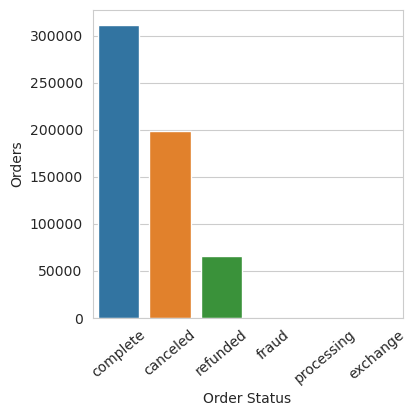

In [39]:
plt.figure(figsize=(4,4))
sns.set_style("whitegrid")
plot = sns.countplot(data=df, x='status')
plot.set_xticklabels(plot.get_xticklabels(), rotation=40)
plt.xlabel("Order Status")
plt.ylabel("Orders")
plt.show()

## Orders Status on different Prices

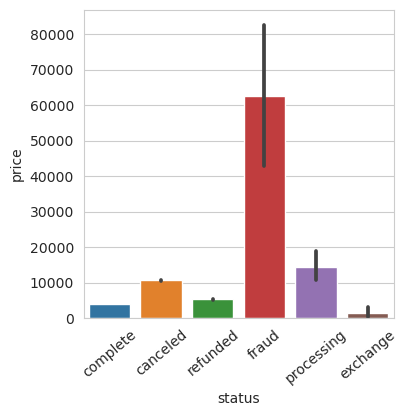

In [40]:
plt.figure(figsize=(4,4))
plot = sns.barplot(data=df, x='status', y='price')
plot.set_xticklabels(plot.get_xticklabels(), rotation=40)
plt.show()

- Orders with price above 40k have chances of fraud
- Orders with low prices are most likely to be completed successfully

# Fraud in Categories

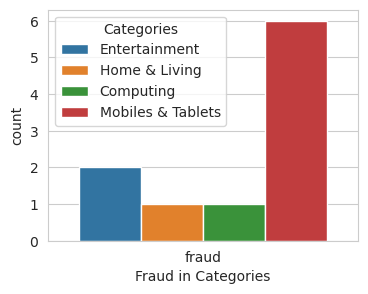

In [41]:
# only fraud 
tmp = df[(df['status'] =='fraud')]

plt.figure(figsize=(4,3))
sns.set_style("whitegrid")
plot = sns.countplot(data=tmp, x='status', hue='category_name_1')
plt.xlabel("Fraud in Categories")
plt.legend(title='Categories')
plt.show()

- There is not much count of frauds, so less probability of frauds
- most fruads are likely to be from Mobile & Tablets category

- It seems like most of the orders placed are of low prices 
- Orders with high prices are mostly cancelled
- Most successfully completed orders are of low price

##  Category Sales

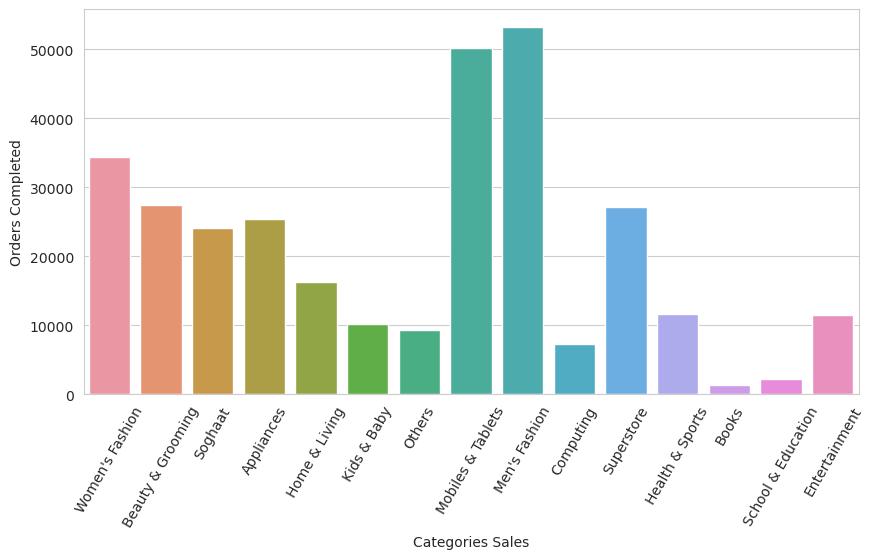

In [42]:
df_comp = df[(df['status'] =='complete')]

plt.figure(figsize=(10,5))
plot = sns.countplot(data=df_comp, x='category_name_1')
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plt.xlabel("Categories Sales")
plt.ylabel("Orders Completed")
plt.show()

### Best Selling Categories
1. Men's Fashion
2. Mobile & Tables
3. Women's Fashion

### Least Selling Categories
1. Books
2. Schools & Education
3. Computing & others

In [43]:
categories = df_comp['category_name_1'].unique()
dic = {}
for cat in categories:
    filt = df_comp['category_name_1']==cat 
    dic[cat] = ((df_comp[filt]['price'] * df_comp[filt]['qty_ordered']).sum()/1000000)
keys = list(dic.keys())
values = list(dic.values())
dic

{"Women's Fashion": 56.66799186,
 'Beauty & Grooming': 21.817278100000003,
 'Soghaat': 7.81718555,
 'Appliances': 234.03189313,
 'Home & Living': 14.42412889,
 'Kids & Baby': 6.017440970000001,
 'Others': 52.320884,
 'Mobiles & Tablets': 629.0450950100001,
 "Men's Fashion": 41.54243691999999,
 'Computing': 46.510935090000004,
 'Superstore': 21.804469010000002,
 'Health & Sports': 9.91077205,
 'Books': 0.575312,
 'School & Education': 1.0266278100000001,
 'Entertainment': 210.33215307000003}

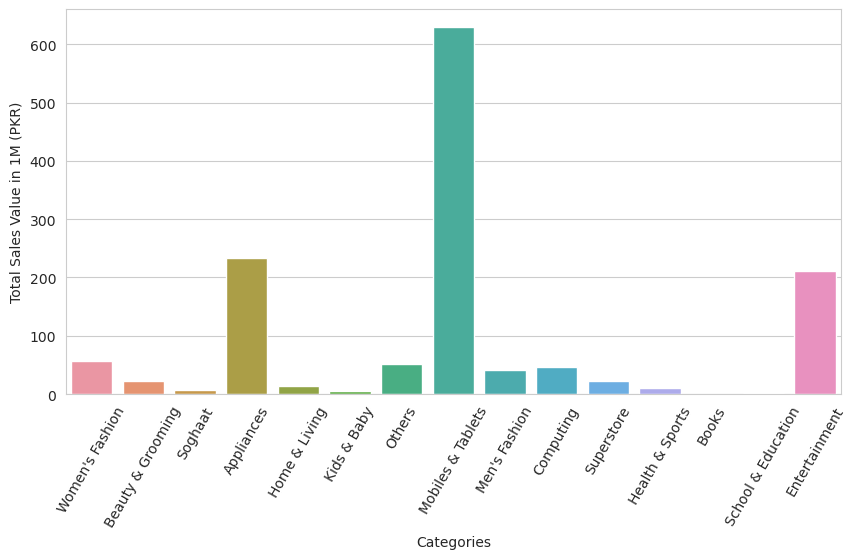

In [44]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=keys, y=values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plt.xlabel("Categories")
plt.ylabel("Total Sales Value in 1M (PKR)")
plt.show()

- ~50k orders of Mobiles & Tablets worth whooping ~62.9 Crore in PKR
- Appliances category has sales value of over ~23.4 Crore 
- Entertainment category (worth ~21 Crore) products despite with very less orders (approx ~10k) worth almost 6 times more than Men's ~54k orders 
  
- Men's fashion category (worth ~4.15 Crore) products get more orders but are of less price than Women's Fashion 
  (worth ~5.6 Crore) products, hence Women's Fashion sales value worth more than of Men's Fashion 

## Payment Methods  

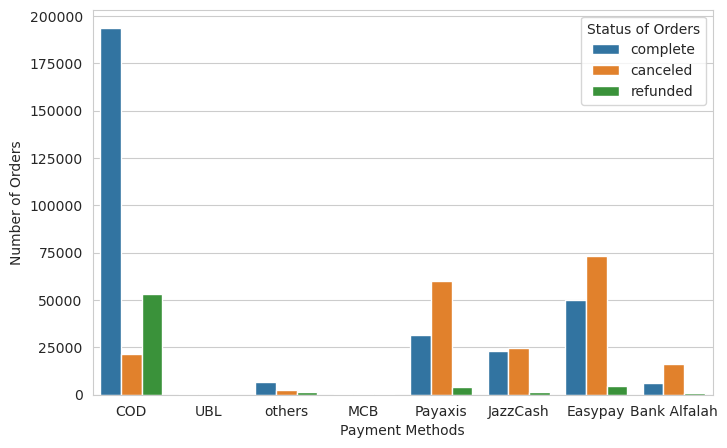

In [45]:
tmp = df[(df['status']=='complete') | (df['status']=='canceled') | (df['status']=='refunded')]

plt.figure(figsize=(8,5))
plot = sns.countplot(data=tmp, x='payment_method', hue='status')
plt.xlabel("Payment Methods")
plt.ylabel("Number of Orders")
plt.legend(title='Status of Orders')
plt.show()

- most prominent payment method is 'Cash on Delivery (COD)' 
- most orders that actually completed succeffully are of COD
- Orders with payments methods other than COD are most likely to be cancelled

In [46]:
df.sample(5)

,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method
426102,canceled,1/25/2018,APPGEE5A438CFCD4C13,7289.00,1.0,7289.000,Appliances,0.0000,Payaxis
138186,refunded,1/23/2017,SNU_Su16c-2B-Pink,1750.00,1.0,1750.000,Women's Fashion,0.0000,COD
384873,complete,11/24/2017,HALHOM59DC97D2531CA,390.83,1.0,2396.664,Home & Living,90.6893,Easypay
367256,complete,11/22/2017,APPGAB5A0197E01A817,5775.00,1.0,4272.000,Appliances,1503.0000,Easypay
107279,complete,11/27/2016,motif_MPT-524-BLACK-36,549.50,1.0,1943.500,Men's Fashion,0.0000,COD


In [47]:
tmp = ['processing', 'exchange', 'fraud', 'canceled', 'refunded']
for w in tmp:
    df.drop(df[df['status'] == w].index, axis=0, inplace=True)
df.status.unique()

array(['complete'], dtype=object)

In [48]:
df.drop(['category_name_1','status','payment_method'],axis=1, inplace=True)

In [49]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%m/%d/%Y')

In [50]:
# Rename for resampling in days
df.rename(columns={'created_at': 'date', 'price': 'acc_prods_price','grand_total':'sales_value', 'qty_ordered':'total_orders'}, inplace=True)
df.set_index('date', inplace=True)
df.head(2)

,sku,acc_prods_price,total_orders,sales_value,discount_amount
date,,,,,
2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,0.0
2016-07-01,kcc_krone deal,360.0,1.0,60.0,300.0


In [51]:
# Engineer a new feature of total customers. If we count orders in a day, which is equavalent to the customers of the day
df['total_customers'] = df['total_orders']

In [52]:
df.head()

,sku,acc_prods_price,total_orders,sales_value,discount_amount,total_customers
date,,,,,,
2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,0.0,1.0
2016-07-01,kcc_krone deal,360.0,1.0,60.0,300.0,1.0
2016-07-01,kcc_krone deal,360.0,1.0,60.0,300.0,1.0
2016-07-01,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,0.0,1.0
2016-07-01,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,0.0,1.0


In [53]:
dic = {}
for col in df.columns:
    if col == 'total_customers':
        dic[col] = 'count'
    elif col == 'sku':
        pass
    else:
        dic[col] = 'sum'
        
df1 = df.select_dtypes(include=['number','bool']).resample('d').agg(dic)
df1

,acc_prods_price,total_orders,sales_value,discount_amount,total_customers
date,,,,,
2016-07-01,304916.00,407.0,355311.00,7300.00,362
2016-07-02,226371.00,163.0,250034.00,2100.00,140
2016-07-03,77723.00,99.0,105643.00,1500.00,90
2016-07-04,175632.25,159.0,576674.25,4000.00,139
2016-07-05,73677.25,106.0,216809.50,3629.00,95
...,...,...,...,...,...
2018-08-24,352428.25,253.0,1034315.10,30897.15,187
2018-08-25,252307.05,215.0,713341.20,600.00,170
2018-08-26,298647.40,109.0,494722.40,500.00,96


In [54]:
df1.reset_index(inplace=True)
df1['day'] = df1['date'].dt.day
df1['month'] = df1['date'].dt.month
df1['year'] = df1['date'].dt.year
df1.sample(5)

,date,acc_prods_price,total_orders,sales_value,discount_amount,total_customers,day,month,year
230,2017-02-16,616283.50,293.0,787072.00,1000.00,215,16,2,2017
88,2016-09-27,307432.65,265.0,522292.60,6289.50,253,27,9,2016
240,2017-02-26,414167.50,174.0,510808.00,2000.00,160,26,2,2017
68,2016-09-07,292140.00,172.0,366984.00,0.00,162,7,9,2016
589,2018-02-10,621963.25,426.0,1127055.86,1420440.84,377,10,2,2018


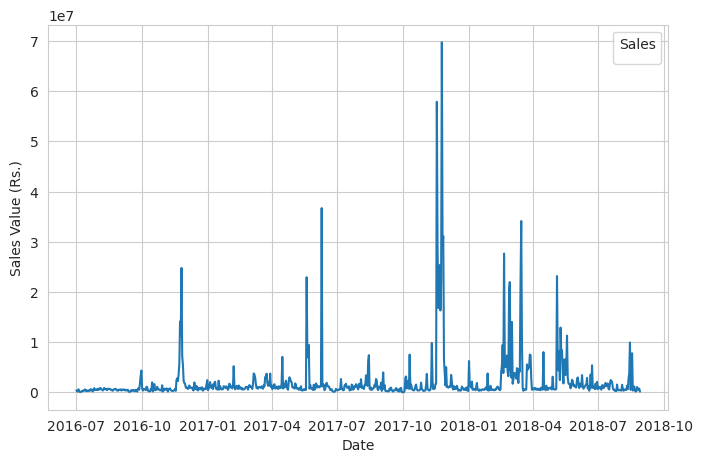

In [55]:
plt.figure(figsize=(8,5))
plot = sns.lineplot(data=df1, x='date' , y='sales_value')
plt.xlabel("Date")
plt.ylabel("Sales Value (Rs.)")
plt.legend(title='Sales')
plt.show()

## Hikes in Novembers 
- November has been month of sales in recent years in Pakistan 

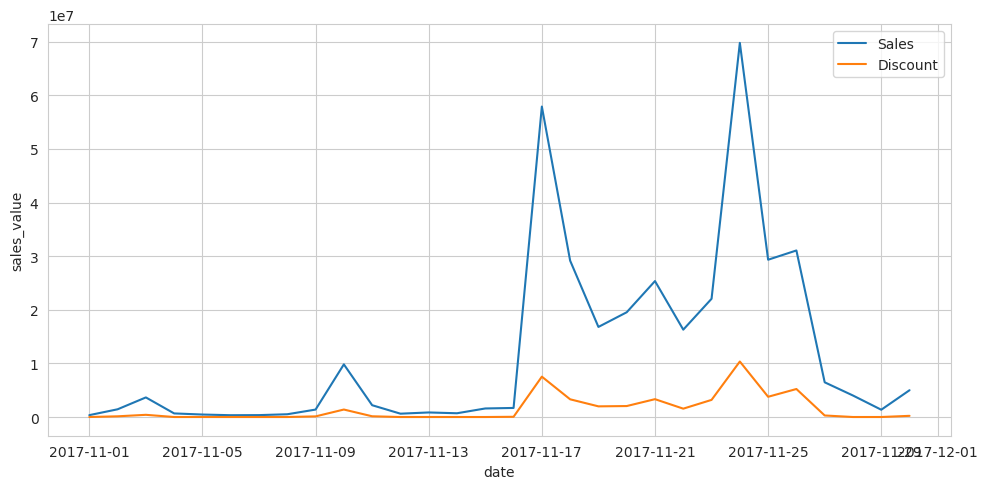

In [56]:
tmp = df1.set_index('date')
tmp = tmp.loc['2017-11']
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plot = sns.lineplot(data=tmp, x=tmp.index, y='sales_value', label='Sales')
plt.plot(tmp.index, tmp.discount_amount, label='Discount')
plt.legend()
plt.tight_layout()
plt.show()

### case in 2017 (graph above)
- looks like it was 11-11 sales of Daraz that's why got more orders and sales on 11 (first day) and 17 (last day) of sale
- on 24 November, I searched, it was Black Friday sale (maybe everywhere that is why it got more hike than of 11-11 sale)
- other hikes in the sales and orders may also be the result of such sales